<a href="https://colab.research.google.com/github/amir-seddighi/ML-Python-Tutorial/blob/main/ML_9_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import files          #Upload studentclustering.csv from the main folder of the course 
uploaded = files.upload()

Saving studentclustering.csv to studentclustering.csv


In [ ]:
data = pd.read_csv('studentclustering.csv')
data.head()

,marks,shours
0,72,20.0
1,42,19.0
2,77,7.0
3,93,22.0
4,30,20.0


Text(0, 0.5, 'Study Hours')

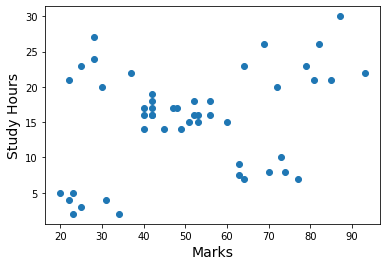

In [ ]:
plt.scatter(data['marks'], data['shours'] )
plt.xlabel('Marks', fontsize=14)
plt.ylabel('Study Hours', fontsize=14)

In [ ]:
#Normalize the data using min-max scale

from sklearn.preprocessing import minmax_scale

data_scaled = minmax_scale(data)


##KMeans Clustering

In [ ]:
#Import KMeans:
from sklearn.cluster import KMeans
Kmeans = KMeans(n_clusters=3, random_state = 1020)

#Fit the data to get the clusters:
Kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1020, tol=0.0001, verbose=0)

In [ ]:
#Lets see what labels are assigned to each data point

labels = Kmeans.labels_
labels  # clusters: 0, 1 ,2

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 2, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 1, 1, 1, 0, 2, 1, 0, 1,
       0, 1, 1, 2, 0], dtype=int32)

In [ ]:
#Visualize the clusters

labels = pd.DataFrame(labels)
df = pd.concat([data, labels], axis =1)
df = df.rename(columns = {0:'Labels'})
df.head()

,marks,shours,Labels
0,72,20.0,0
1,42,19.0,1
2,77,7.0,0
3,93,22.0,0
4,30,20.0,1


Text(0, 0.5, 'Study Hours')

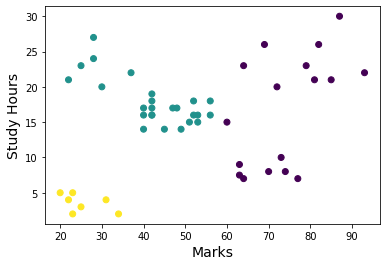

In [ ]:
plt.scatter(df['marks'], df['shours'] , c=df.Labels )  #This is how to color data points based on column value
plt.xlabel('Marks', fontsize=14)
plt.ylabel('Study Hours', fontsize=14)

##But how many clusters should we create? In this example, K=5 makes more sense:

Text(0, 0.5, 'Study Hours')

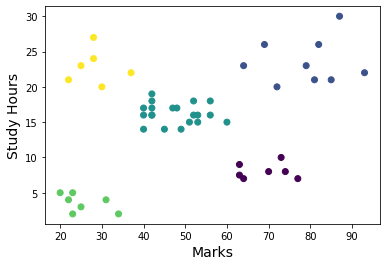

In [ ]:
#Import KMeans:
from sklearn.cluster import KMeans
Kmeans = KMeans(n_clusters=5, random_state = 1020)

#Fit the data to get the clusters:
Kmeans.fit(data_scaled)


labels = Kmeans.labels_

#Visualize the clusters
labels = pd.DataFrame(labels)
df = pd.concat([data, labels], axis =1)
df = df.rename(columns = {0:'Labels'})
plt.scatter(df['marks'], df['shours'] , c=df.Labels )  #This is how to color data points based on column value
plt.xlabel('Marks', fontsize=14)
plt.ylabel('Study Hours', fontsize=14)

##Elbow Method for determining optimum number of clusters

Text(0, 0.5, 'Inertia')

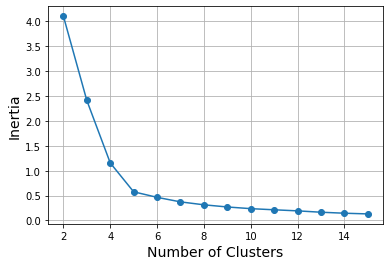

In [ ]:
from sklearn.cluster import KMeans

inertia = []
for i in range (2, 16):
 Kmeans = KMeans(n_clusters= i, random_state = 1020)
 #Fit the data to get the clusters:
 Kmeans.fit(data_scaled)
 inertia.append(Kmeans.inertia_)

#Now plot the inertia VS. number of clusters to see that "Elbow" curve!
plt.plot(range(2,16), inertia, marker ='o') 
plt.grid()
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Inertia', fontsize=14)

#We can see from this curve that K=5 would be the optimum number of clusters to create
